Pouya Lahabi - 400109843

# Q1 - Radio Signal

## a) read mixed signal

In [57]:
import soundfile as sf

filePath = 'mixed_signal.wav'
signal, sampleRate1 = sf.read(filePath)
print(sampleRate1)

882000


## b) Plotting DTFT

In [58]:
from library import compute_fft

abs_DTFT_of_signal, frequencies = compute_fft(signal, sample_rate= sampleRate1)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


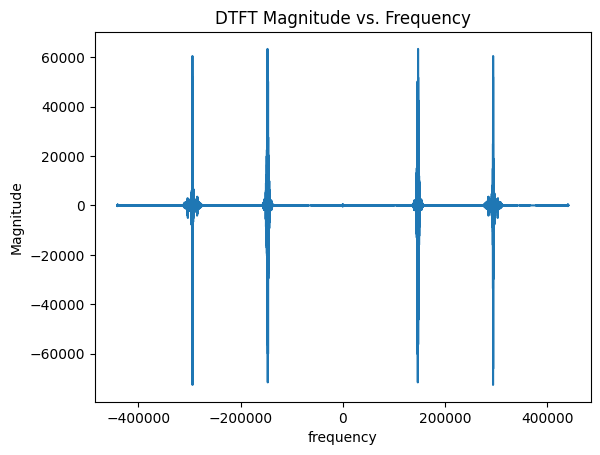

In [59]:
import matplotlib.pyplot as plt

plt.plot(frequencies, abs_DTFT_of_signal)
plt.xlabel("frequency")
plt.ylabel("Magnitude")
plt.title("DTFT Magnitude vs. Frequency")
plt.show()

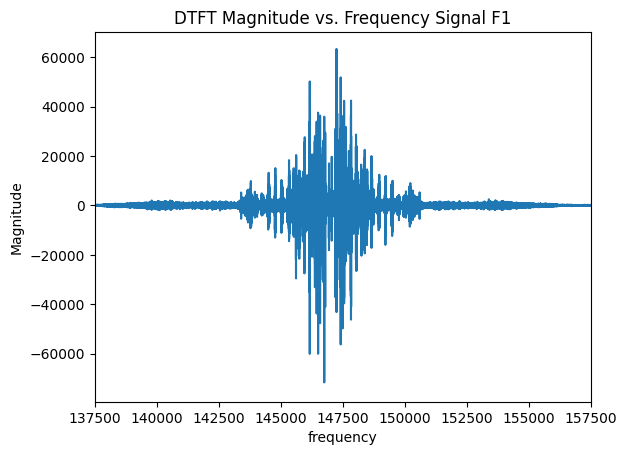

In [60]:
## plotting f1

plt.plot(frequencies, abs_DTFT_of_signal)
plt.xlabel("frequency")
plt.ylabel("Magnitude")
plt.xlim(137500, 157500)
plt.title("DTFT Magnitude vs. Frequency Signal F1")
plt.show()

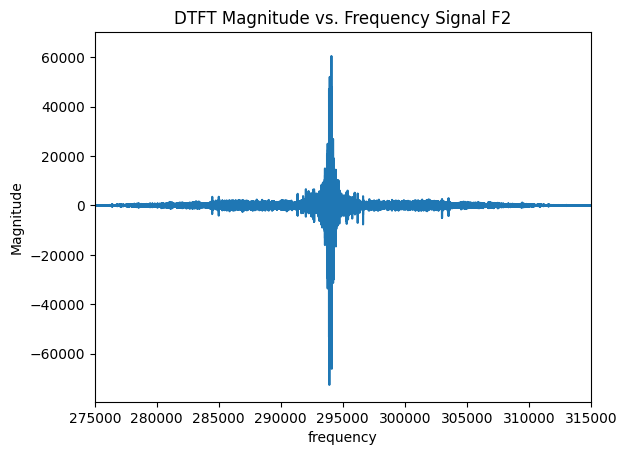

In [61]:
## plotting f2 signal

plt.plot(frequencies, abs_DTFT_of_signal)
plt.xlabel("frequency")
plt.ylabel("Magnitude")
plt.xlim(275000, 315000)
plt.title("DTFT Magnitude vs. Frequency Signal F2")
plt.show()

## c) finding f1 and f2 using plot

both signals are real with no imaginary part since we have their DTFT in both -f and +f frequencies.

signal 1 happens at $Frequency = 147000Hz$

signal 2 happens at $Frequency = 294000Hz$

## d) shifting signals

In [62]:
import numpy as np

Fs = sampleRate1
t = np.arange(0, len(signal) / Fs, 1 / Fs)
f1 = 147000
carrier1 = np.cos(2 * np.pi * f1 * t)

shiftedSignal = signal * carrier1


In [63]:
abs_DTFT_of_signalF1, frequenciesF1 = compute_fft(shiftedSignal, sample_rate= sampleRate1)

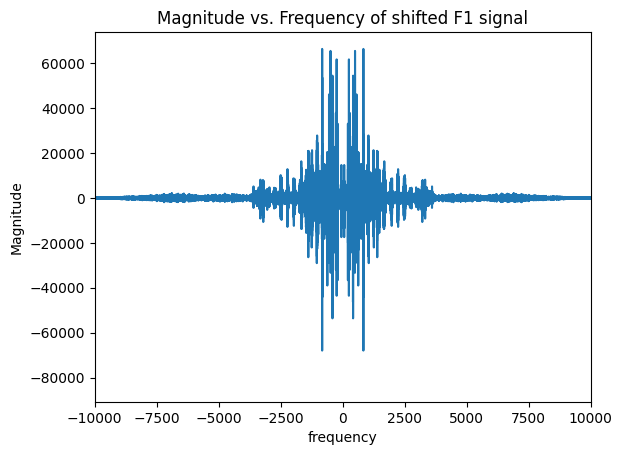

In [64]:
plt.plot(frequenciesF1, abs_DTFT_of_signalF1)
plt.xlim(-10000, 10000)
plt.xlabel("frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude vs. Frequency of shifted F1 signal")
plt.show()

## e) is signal Real Or Imaginary

this signal is completely real

## f) Low pass-Filer

In [65]:
from scipy.signal import firwin, lfilter

cutoffFreq = 1e3
filterOrder = 10
filterCoefficients = firwin(filterOrder, cutoffFreq / (sampleRate1 / 2))
filteredSignal = lfilter(filterCoefficients, 1, shiftedSignal)

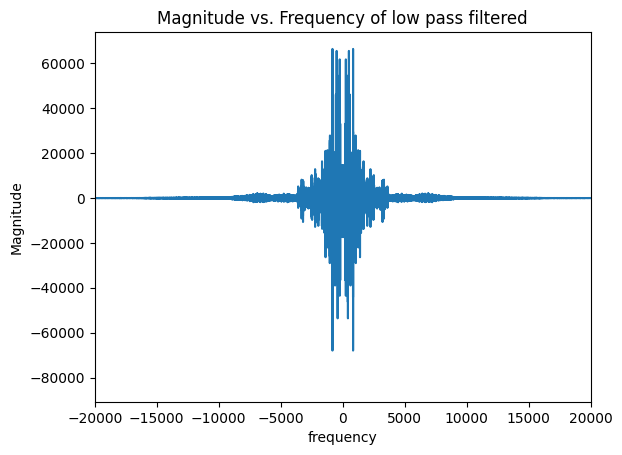

In [75]:
abs_DTFT_of_low_pass_filtered, frequencies_low_pass_filtered = compute_fft(filteredSignal, sample_rate= sampleRate1)

plt.plot(frequenciesF1, abs_DTFT_of_signalF1)
plt.xlim(-20000, 20000)
plt.xlabel("frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude vs. Frequency of low pass filtered")
plt.show()

## g) Is signal real or imaginary

this signal is completely real

## h) downsample with resampling

In [83]:
from scipy.signal import resample

downsampledSignal = resample(filteredSignal, int(len(filteredSignal) * 44100 / sampleRate1))

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


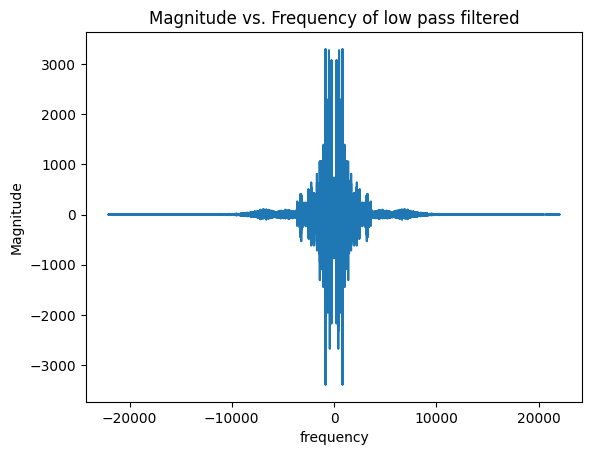

In [78]:
abs_DTFT_of_downsampled_signal, downsampled_frequencies = compute_fft(downsampledSignal, 44100)

plt.plot(downsampled_frequencies, abs_DTFT_of_downsampled_signal)
plt.xlabel("frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude vs. Frequency of low pass filtered")
plt.show()

## i) playing the music

In [89]:
import sounddevice as sd

sd.play(downsampledSignal, 44100)
sd.wait()

## j) repeating the same process for second music

In [81]:
Fs = sampleRate1
t = np.arange(0, len(signal) / Fs, 1 / Fs)
f2 = 294000
carrier2 = np.cos(2 * np.pi * f2 * t)

shiftedSignal2 = signal * carrier2

In [82]:
cutoffFreq = 1e3
filterOrder = 10

filterCoefficients2 = firwin(filterOrder, cutoffFreq / (sampleRate1 / 2))
filteredSignal2 = lfilter(filterCoefficients2, 1, shiftedSignal2)

In [84]:
downsampledSignal2 = resample(filteredSignal2, int(len(filteredSignal2) * 44100 / sampleRate1))

In [86]:
sd.play(downsampledSignal2, 44100)
sd.wait()

Religious Music : Mahmoud Karimi - Khodaya Bebakhsh

Joyful Music : Hassan ShamaeiZadeh - Rotab

# Q2 - Hybrid Pictures

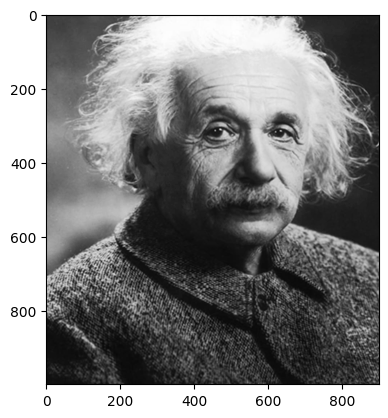

In [92]:
img1 = plt.imread('face1.png')
plt.imshow(img1, cmap='gray')

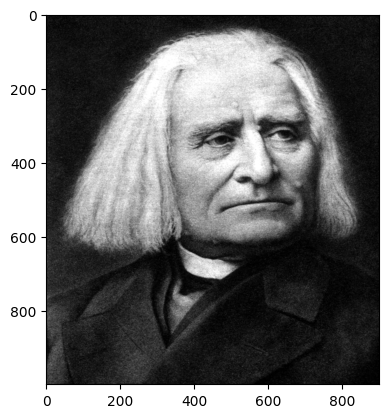

In [93]:
img2 = plt.imread('face2.png')
plt.imshow(img2, cmap='gray')

In [114]:
from scipy.ndimage import gaussian_filter

img2_high = img2 - gaussian_filter(img2, sigma = 10)
img1_low = gaussian_filter(img1, sigma = 10)

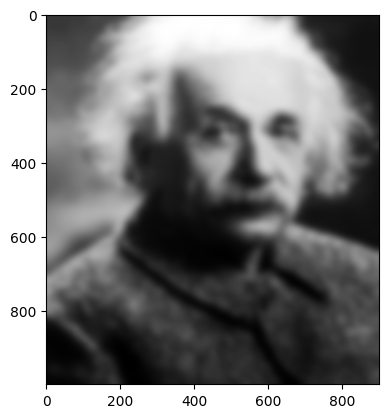

In [115]:
## low-frequency of img1
plt.imshow(img1_low, cmap='gray')

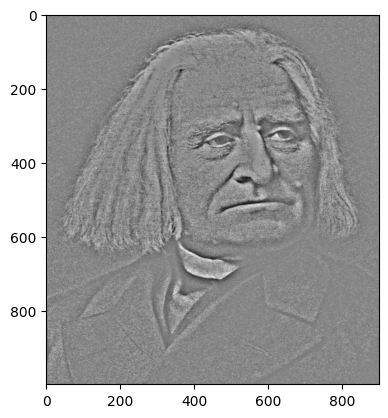

In [116]:
# high frequency of img2
plt.imshow(img2_high, cmap='gray')

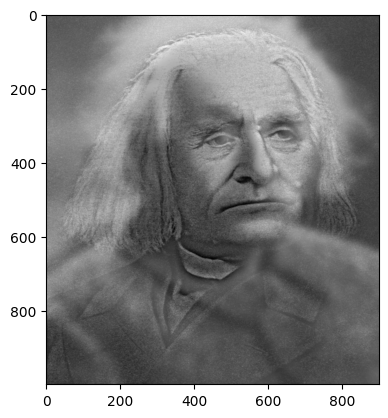

In [117]:
# hybrid image

hybrid_image = img1_low + img2_high
plt.imshow(hybrid_image, cmap='gray')